In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('classic')
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('out.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
df["key"] = df["start letter"] + df["end letter"]

In [9]:
df.drop(['start letter','end letter'],axis =1, inplace=True)

In [11]:
dfclean = df.groupby('key').mean().reset_index()

<AxesSubplot:xlabel='ms', ylabel='Density'>

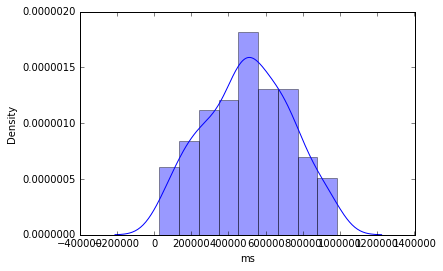

In [13]:
sns.distplot(dfclean['ms'])

In [16]:
from scipy.cluster.vq import kmeans, vq
y = dfclean['ms']
codebook, _ = kmeans(y, 3)
cluster_indices, _ = vq(y, codebook)
dfclean['cluster'] = cluster_indices

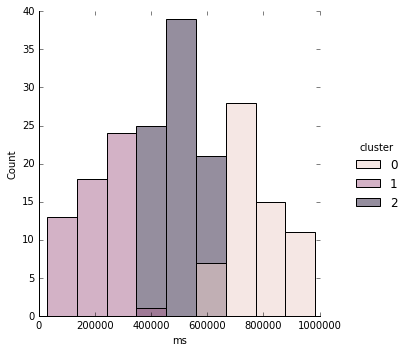

In [20]:
sns.displot(x=dfclean['ms'],hue=dfclean['cluster'])

AttributeError: 'numpy.ndarray' object has no attribute 'cluster_centers_'

In [23]:
dis = []
for i in range(1,10):
    codebook, distortion = kmeans(y, i)
    dis.append(distortion)

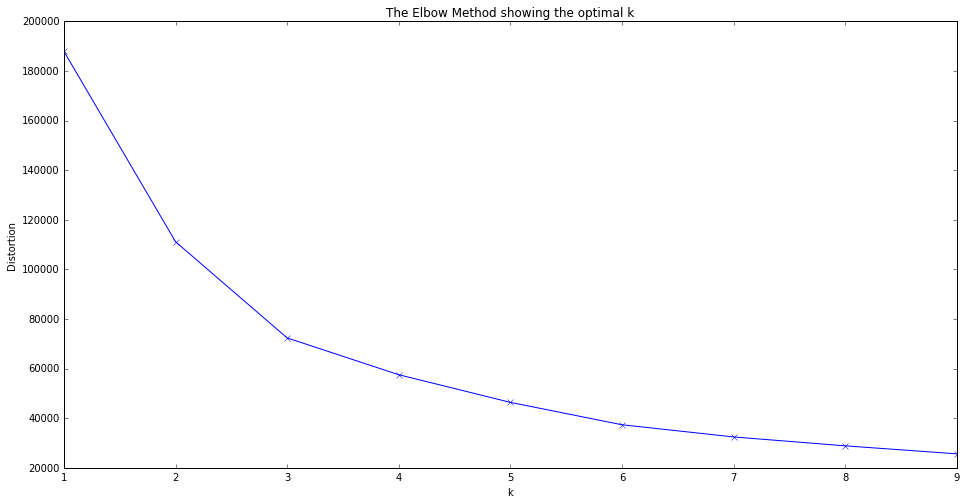

In [24]:
plt.figure(figsize=(16,8))
plt.plot(range(1,10), dis, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [30]:
average = dfclean.groupby('cluster').mean().reset_index()
average

,cluster,ms
0,0,771876.726366
1,1,212630.404464
2,2,500575.207816


In [31]:
dfclean.head()

,key,ms,cluster
0,'e,716292.0,0
1,",,",944222.0,0
2,",a",687676.0,0
3,",backspace",500027.0,2
4,",shift",179790.0,1


In [48]:
dic = {}
to_add = {"ee":"oo"}
dic.update(to_add)
dic

{'ee': 'oo'}

In [55]:
newdf = dfclean.copy()
final = pd.DataFrame()
dic = {}
for index, row in newdf.iterrows():
    clusl = str(row['cluster']) + "Label"
    clusp = str(row['cluster']) + "Precentage"
    try:
        #print(clusl)
        print("dic clusl",dic[clusl])
        to_add_str = row['key']
        liz = dic[clusl]
        print("liz,add",liz,to_add_str)
        ad = liz.append(str(to_add_str))
        print("ad",ad)
        to_add = {clusl:ad}
        print("toadd",to_add)
        dic.update(to_add)
        print("after update",dic)
    except Exception as e:
        print('added',e)
        dic[clusl] = [row['key']]
        print("DIC",dic)

added '0Label'
DIC {'0Label': ["'e"]}
dic clusl ["'e"]
liz,add ["'e"] ,,
ad None
toadd {'0Label': None}
after update {'0Label': None}
dic clusl None
liz,add None ,a
added 'NoneType' object has no attribute 'append'
DIC {'0Label': [',a']}
added '2Label'
DIC {'0Label': [',a'], '2Label': [',backspace']}
added '1Label'
DIC {'0Label': [',a'], '2Label': [',backspace'], '1Label': [',shift']}
dic clusl [',backspace']
liz,add [',backspace'] ,space
ad None
toadd {'2Label': None}
after update {'0Label': [',a'], '2Label': None, '1Label': [',shift']}
dic clusl [',a']
liz,add [',a'] .space
ad None
toadd {'0Label': None}
after update {'0Label': None, '2Label': None, '1Label': [',shift']}
dic clusl [',shift']
liz,add [',shift'] Ashift
ad None
toadd {'1Label': None}
after update {'0Label': None, '2Label': None, '1Label': None}
dic clusl None
liz,add None Dd
added 'NoneType' object has no attribute 'append'
DIC {'0Label': None, '2Label': None, '1Label': ['Dd']}
dic clusl None
liz,add None Gg
added 'None

In [36]:
dic

{'0Label': ['wspace'], '2Label': ['ww'], '1Label': None}

In [5]:
#Hard to reach characters
check = df.loc[df['start letter'] == 'w']
check

,ms,start letter,end letter,key
79,436171,w,h,wh
217,204099,w,i,wi
259,624219,w,e,we
318,347734,w,w,ww
319,419762,w,h,wh
331,656343,w,w,ww
332,782064,w,space,wspace


In [64]:
df['ms'] = np.where(df['start letter'] == 'W', df['ms'] + 2000, df['ms'])
df['ms'] = np.where(df['start letter'] == 'Q', df['ms'] + 2500, df['ms'])
df['ms'] = np.where(df['start letter'] == 'A', df['ms'] + 2200, df['ms'])
df['ms'] = np.where(df['start letter'] == 'S', df['ms'] + 2000, df['ms'])

df['ms'] = np.where(df['start letter'] == 'R', df['ms'] - 500, df['ms'])
df['ms'] = np.where(df['start letter'] == 'F', df['ms'] - 500, df['ms'])
df['ms'] = np.where(df['start letter'] == 'V', df['ms'] - 500, df['ms'])
df['ms'] = np.where(df['start letter'] == 'B', df['ms'] - 500, df['ms'])

In [76]:
df

,ms,start letter,end letter
0,83663,s,n
1,192002,n,n
2,796296,n,w
3,763871,w,y
4,855389,y,u
...,...,...,...
494,455554,s,t
495,603656,t,t
496,743165,t,y
497,979706,y,space


In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["st"] = le.fit_transform(df["start letter"])
df["el"] = le.fit_transform(df["end letter"])

In [113]:
st = pd.get_dummies(df["start letter"])
st = st.add_prefix("st_")
el = pd.get_dummies(df["end letter"])
el = el.add_prefix("el_")
df = pd.concat([df,el,st], axis=1, join='inner')

In [132]:
y = df.ms.copy()
X = df.drop(['ms','start letter','end letter'], axis = 1) 

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [134]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [135]:
from sklearn.metrics import mean_squared_error
print(clf.score(X_test,y_test))
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test,y_pred))

0.029701390153512697
74125975852.33066


In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [83]:
r_sq = reg.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {reg.intercept_}")
print(f"slope: {reg.coef_}")
reg.predict([[22,0]])

coefficient of determination: 0.00833929865334282
intercept: 496334.79990113794
slope: [ 3366.15459032 -2021.72956296]


In [86]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)

In [87]:
r_sq = reg.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {reg.intercept_}")
print(f"slope: {reg.coef_}")
reg.predict([[22,0]])

coefficient of determination: 0.008339298653337823
intercept: 496334.7994432284
slope: [ 3366.15241988 -2021.72737955]


array([570390.15268067])